In [2]:
import os
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
warnings.simplefilter("ignore")
import matplotlib
import tensorflow as tf  # Version 1.0.0 (some previous versions are used in past commits)
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
from subprocess import call

print("")

print("Downloading...")
if not os.path.exists("UCI HAR Dataset.zip"):
    call(
        'wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI HAR Dataset.zip"',
        shell=True
    )
    print("Downloading done.\n")
else:
    print("Dataset already downloaded. Did not download twice.\n")


print("Extracting...")
extract_directory = os.path.abspath("UCI HAR Dataset")
if not os.path.exists(extract_directory):
    call(
        'unzip -nq "UCI HAR Dataset.zip"',
        shell=True
    )
    print("Extracting successfully done to {}.".format(extract_directory))
else:
    print("Dataset already extracted. Did not extract twice.\n")


Downloading...

Extracting...
Dataset already extracted. Did not extract twice.



In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf  # Version 1.0.0 (some previous versions are used in past commits)
from sklearn import metrics

import os
import warnings
warnings.filterwarnings('ignore')

In [5]:
INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]

# Output classes to learn how to classify
LABELS = [
    "WALKING", 
    "WALKING_UPSTAIRS", 
    "WALKING_DOWNSTAIRS", 
    "SITTING", 
    "STANDING", 
    "LAYING"
]

In [6]:
'''
!pwd && ls
os.chdir(DATA_PATH)
!pwd && ls

!python download_dataset.py

!pwd && ls
os.chdir("..")
!pwd && ls

DATASET_PATH = DATA_PATH + "UCI HAR Dataset/"
'''

'\n!pwd && ls\nos.chdir(DATA_PATH)\n!pwd && ls\n\n!python download_dataset.py\n\n!pwd && ls\nos.chdir("..")\n!pwd && ls\n\nDATASET_PATH = DATA_PATH + "UCI HAR Dataset/"\n'

In [7]:
DATASET_PATH = "/Users/hormone03/Desktop/Human_Act_Detection/UCI HAR Dataset/"


In [8]:
my_path="/Users/hormone03/Desktop/Human_Act_Detection/UCI HAR Dataset/"

train_df = pd.read_csv("/Users/hormone03/Desktop/Human_Act_Detection/UCI HAR Dataset/train/X_train.txt", delim_whitespace = True)

train_df["subject_id"] = pd.read_csv("/Users/hormone03/Desktop/Human_Act_Detection/UCI HAR Dataset/train/subject_train.txt", header = None, squeeze = True) #squeeze = True will 
#return data in pandas series format

train_df["activity"] = pd.read_csv("/Users/hormone03/Desktop/Human_Act_Detection/UCI HAR Dataset/train/y_train.txt", header = None, squeeze = True)

activity = pd.read_csv("/Users/hormone03/Desktop/Human_Act_Detection/UCI HAR Dataset/train/y_train.txt", header = None, squeeze = True)
#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

train_df["activity_name"] = label_name

train_df.head(3)

,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,-9.2352702e-001,-9.3472378e-001,...,-1.1275434e-001,3.0400372e-002,-4.6476139e-001,-1.8445884e-002,-8.4124676e-001,1.7994061e-001,-5.8626924e-002,subject_id,activity,activity_name
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING


In [9]:
features = list()
with open("/Users/hormone03/Desktop/Human_Act_Detection/UCI HAR Dataset/features.txt") as f:
    for line in f:
        features.append(line.split()[1])

In [10]:
train_df = pd.read_csv("/Users/hormone03/Desktop/Human_Act_Detection/UCI HAR Dataset/train/X_train.txt", delim_whitespace = True, names = features)

train_df["subject_id"] = pd.read_csv("/Users/hormone03/Desktop/Human_Act_Detection/UCI HAR Dataset/train/subject_train.txt", header = None, squeeze = True) #squeeze = True will 
#return data in pandas series format

train_df["activity"] = pd.read_csv("/Users/hormone03/Desktop/Human_Act_Detection/UCI HAR Dataset/train/y_train.txt", header = None, squeeze = True)

activity = pd.read_csv("/Users/hormone03/Desktop/Human_Act_Detection/UCI HAR Dataset/train/y_train.txt", header = None, squeeze = True)
#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

train_df["activity_name"] = label_name

train_df.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [11]:
test_df = pd.read_csv("/Users/hormone03/Desktop/Human_Act_Detection/UCI HAR Dataset/test/X_test.txt", delim_whitespace = True, names = features)

test_df["subject_id"] = pd.read_csv("/Users/hormone03/Desktop/Human_Act_Detection/UCI HAR Dataset/test/subject_test.txt", header = None, squeeze = True) #squeeze = True will 
#return data in pandas series format

test_df["activity"] = pd.read_csv("/Users/hormone03/Desktop/Human_Act_Detection/UCI HAR Dataset/test/y_test.txt", header = None, squeeze = True)

activity = pd.read_csv("/Users/hormone03/Desktop/Human_Act_Detection/UCI HAR Dataset/test/y_test.txt", header = None, squeeze = True)

#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

test_df["activity_name"] = label_name

test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [12]:
# Checking for nan values
print("Number of NaN values in train data is "+str(train_df.isnull().sum().sum()))
print("Number of NaN values in test data is "+str(test_df.isnull().sum().sum()))

# Checking for duplicate values
print("Number of duplicate values in train data is "+str(sum(train_df.duplicated())))
print("Number of duplicate values in test data is "+str(sum(test_df.duplicated())))

Number of NaN values in train data is 0
Number of NaN values in test data is 0
Number of duplicate values in train data is 0
Number of duplicate values in test data is 0


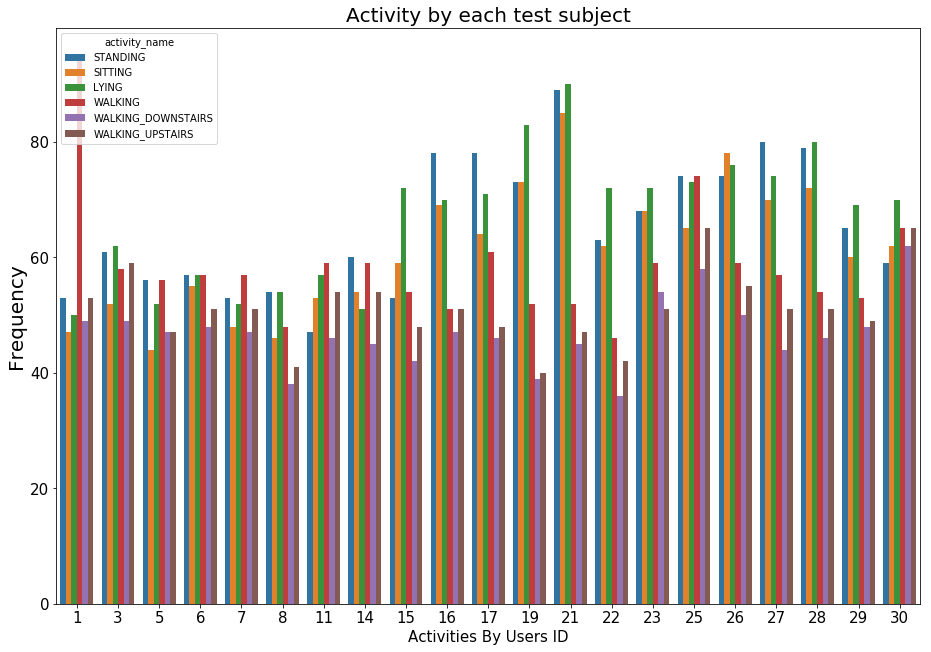

In [13]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject", fontsize = 20, color = "Black")
plt.tick_params(labelsize = 15)
sns.countplot(x = "subject_id", hue = "activity_name", data = train_df)
plt.xlabel("Activities By Users ID", fontsize = 15)
plt.ylabel("Frequency", fontsize = 20, color = "Black" )
plt.show()

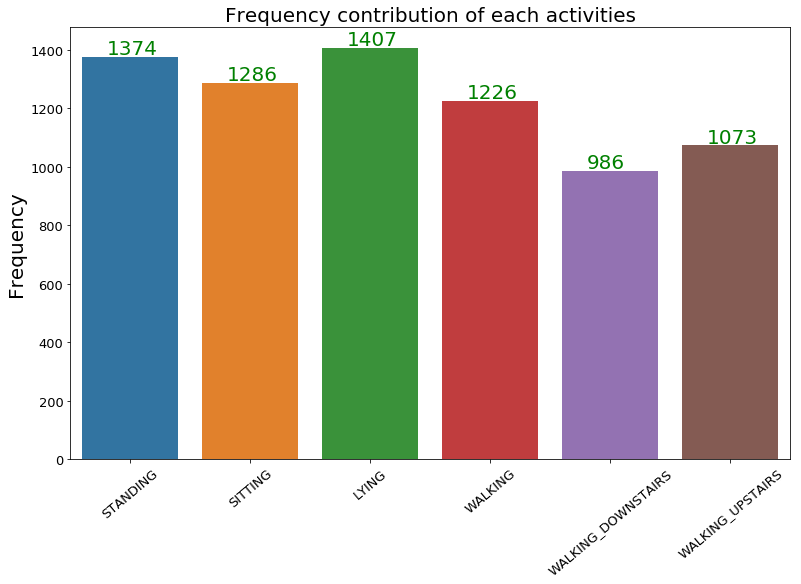

In [14]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Frequency contribution of each activities", fontsize = 20, color= "Black")
plt.tick_params(labelsize = 10)
sns.countplot(x = "activity_name", data = train_df)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "Green")
plt.xlabel("")
plt.ylabel("Frequency", fontsize = 20, color = "Black")
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 40)
plt.show()

In [15]:
columns = train_df.columns

columns = columns.str.replace("[()]", '') 
columns = columns.str.replace("-", '')
columns = columns.str.replace(",", '')
#here, columns is of type pandas index. By writing "columns.str" we have changed its type to 
#pandas string. Pandas string has method called replace which we have used here.

train_df.columns = columns
test_df.columns = columns

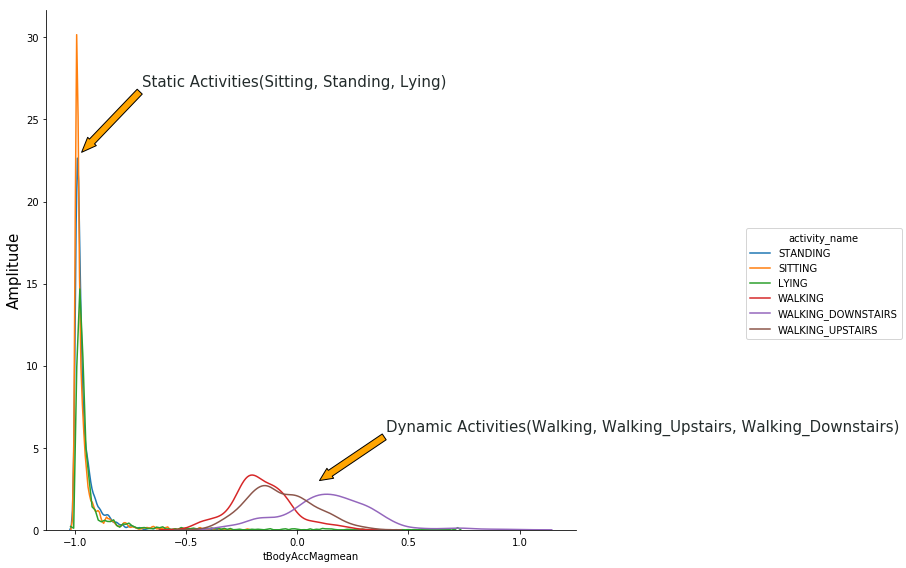

In [16]:
facetgrid = sns.FacetGrid(data = train_df, hue = "activity_name", size = 8)
facetgrid.map(sns.distplot, "tBodyAccMagmean", hist = False).add_legend()
plt.annotate('Static Activities(Sitting, Standing, Lying)', xy=(-0.97, 23), xytext=(-0.7, 27),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 15), size = 15, color = "#232b2b")
plt.annotate('Dynamic Activities(Walking, Walking_Upstairs, Walking_Downstairs)', xy=(0.1, 3), xytext=(0.4, 6),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 13), size = 15, color = "#232b2b")
plt.ylabel("Amplitude", fontsize = 15)

plt.show()

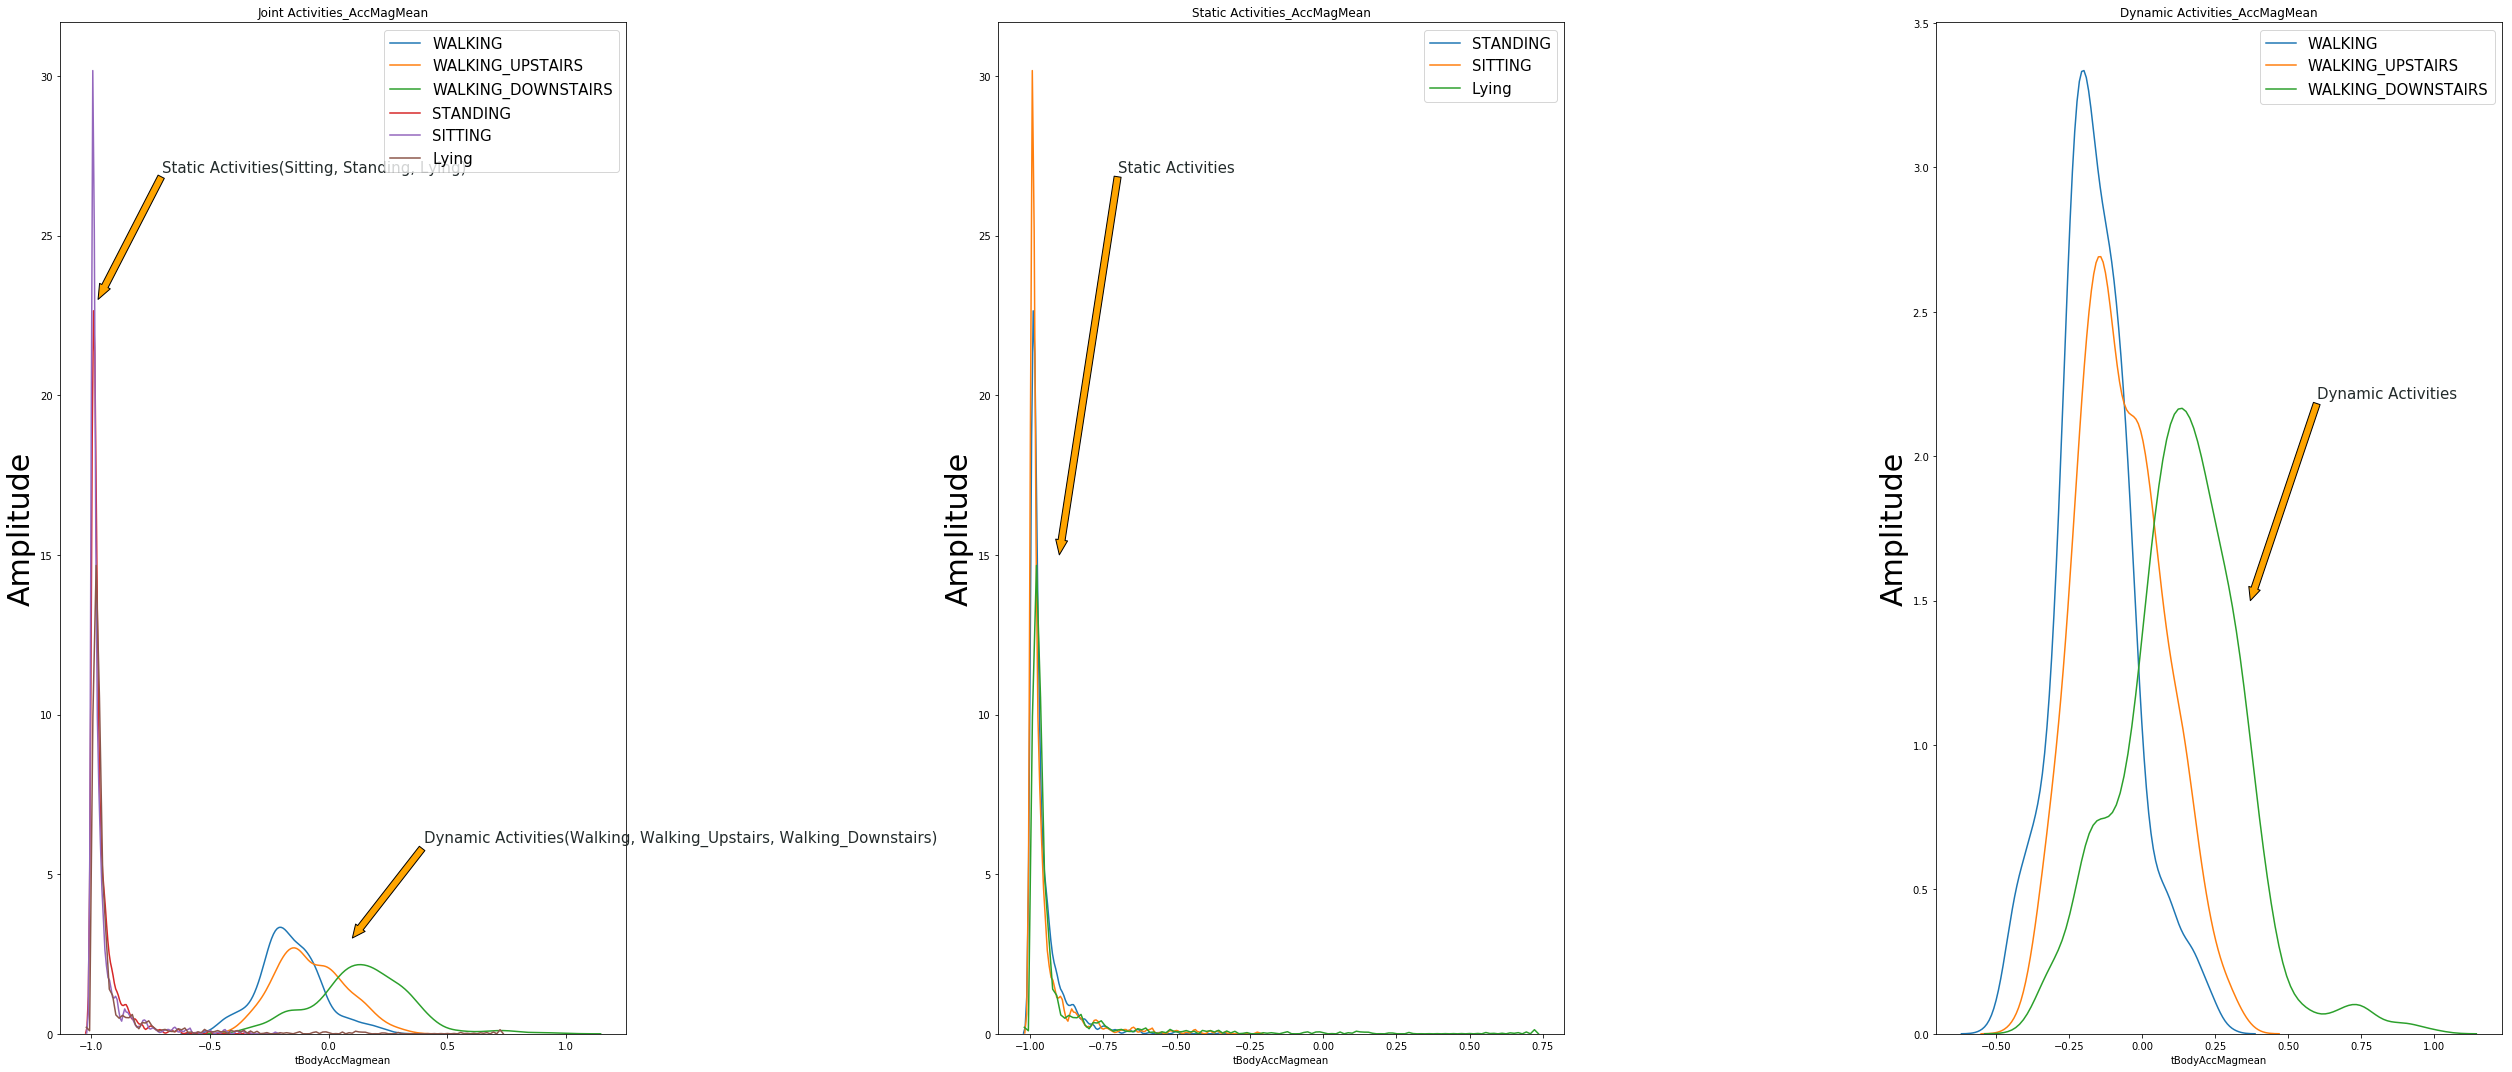

In [17]:
#let's plot "tBodyAccMagmean" for both static and dynamic activites separately to analysis them in more detail
########################
df_standing = train_df[train_df["activity_name"] == "STANDING"]
df_sitting = train_df[train_df["activity_name"] == "SITTING"]
df_lying = train_df[train_df["activity_name"] == "LYING"]
df_walking = train_df[train_df["activity_name"] == "WALKING"]
df_walking_upstairs = train_df[train_df["activity_name"] == "WALKING_UPSTAIRS"]
df_walking_downstairs = train_df[train_df["activity_name"] == "WALKING_DOWNSTAIRS"]

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (35, 15))




axes[0].set_ylabel("Amplitude", fontsize = 30)
axes[0].set_title("Joint Activities_AccMagMean")
sns.distplot(df_walking["tBodyAccMagmean"], hist = False, label = "WALKING", ax = axes[0])
sns.distplot(df_walking_upstairs["tBodyAccMagmean"], hist = False, label = "WALKING_UPSTAIRS", ax = axes[0])
sns.distplot(df_walking_downstairs["tBodyAccMagmean"], hist = False, label = "WALKING_DOWNSTAIRS", ax = axes[0])
sns.distplot(df_standing["tBodyAccMagmean"], hist = False, label = "STANDING", ax = axes[0])
sns.distplot(df_sitting["tBodyAccMagmean"], hist = False, label = "SITTING", ax = axes[0])
sns.distplot(df_lying["tBodyAccMagmean"], hist = False, label = "Lying", ax = axes[0])
axes[0].legend(fontsize = 15)
axes[0].annotate('Static Activities(Sitting, Standing, Lying)', xy=(-0.97, 23), xytext=(-0.7, 27),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 15), size = 15, color = "#232b2b")
axes[0].annotate('Dynamic Activities(Walking, Walking_Upstairs, Walking_Downstairs)', xy=(0.1, 3), xytext=(0.4, 6),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 13), size = 15, color = "#232b2b")




axes[1].set_ylabel("Amplitude", fontsize = 30)
axes[1].set_title("Static Activities_AccMagMean")
sns.distplot(df_standing["tBodyAccMagmean"], hist = False, label = "STANDING", ax = axes[1])
sns.distplot(df_sitting["tBodyAccMagmean"], hist = False, label = "SITTING", ax = axes[1])
sns.distplot(df_lying["tBodyAccMagmean"], hist = False, label = "Lying", ax = axes[1])
axes[1].legend(fontsize = 15)
axes[1].annotate('Static Activities', xy=(-0.90, 15), xytext=(-0.7, 27),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 15), size = 15, color = "#232b2b")

axes[2].set_ylabel("Amplitude", fontsize = 30)
axes[2].set_title("Dynamic Activities_AccMagMean")
sns.distplot(df_walking["tBodyAccMagmean"], hist = False, label = "WALKING", ax = axes[2])
sns.distplot(df_walking_upstairs["tBodyAccMagmean"], hist = False, label = "WALKING_UPSTAIRS", ax = axes[2])
sns.distplot(df_walking_downstairs["tBodyAccMagmean"], hist = False, label = "WALKING_DOWNSTAIRS", ax = axes[2])
axes[2].legend(fontsize = 15)
axes[2].annotate('Dynamic Activities', xy=(0.37, 1.5), xytext=(0.60, 2.2),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 13), size = 15, color = "#232b2b")


plt.tight_layout()
plt.show()


In [18]:
###Observation
#From above two plots we can clearly observe that how well "tBodyAccMagmean"--which is the magnitude of the mean of body
#acceleration in time-domain meaured by accelerometer--is able to separate static activity from dynamic activity. 
#This shows that features are very carefully engineered by domian experts.


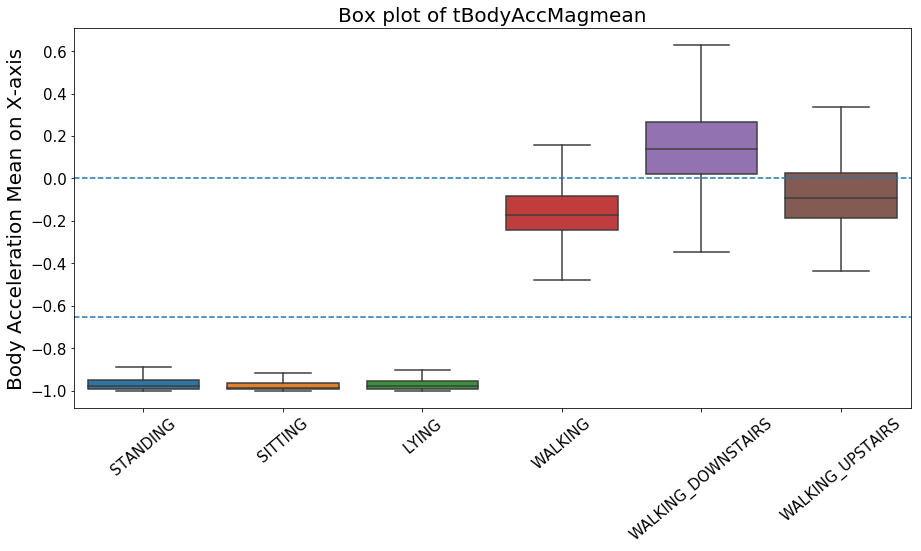

In [19]:
####NOTE: Accelerometer readings are divided into gravity acceleration and body acceleration readings, 
#which has x, y and z components each.

plt.figure(figsize = (15, 7))
sns.boxplot(x = "activity_name", y = "tBodyAccMagmean", showfliers = False, data = train_df)
plt.axhline(y = -0.65, linestyle = "--")
plt.axhline(y = 0, linestyle = "--")
plt.title("Box plot of tBodyAccMagmean", fontsize = 20)
plt.ylabel("Body Acceleration Mean on X-axis", fontsize = 20, color = "Black")
plt.xlabel("Activity Name", fontsize = 15)
plt.xlabel("")
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

In [20]:
#Observations:

#If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
#If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
#If tAccMean > 0.0 then the Activity is WalkingDownstairs.
#We can classify 75% the Acitivity labels with some errors.


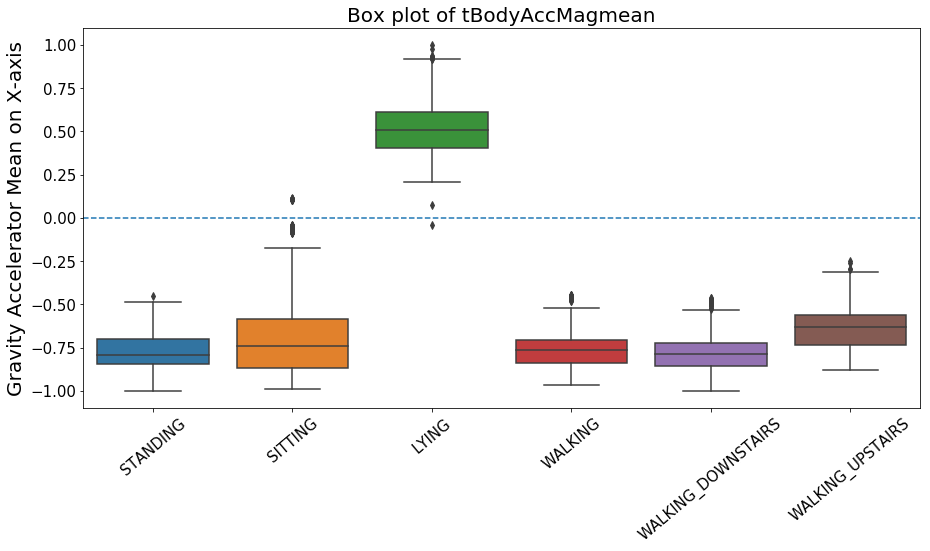

In [21]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "activity_name", y = "angleXgravityMean", showfliers = True, data = train_df)
plt.axhline(y = 0, linestyle = "--")
plt.title("Box plot of tBodyAccMagmean", fontsize = 20, color = "Black")
plt.ylabel("Gravity Accelerator Mean on X-axis", fontsize = 20, color = "Black")
plt.xlabel("")
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

In [22]:
#Observation

#If Acc Gravity Mean > 0, we can infer that the activity will most likely be Lying.
#If Acc Gravity Mean < 0, we can infer that the activity can be anything but Lying.

In [23]:
def plt_tsne(perplexity, train_df):
    data = train_df.drop(["subject_id", "activity", "activity_name"], axis = 1)
    data_label = train_df["activity_name"]
    applying_tsne = TSNE(n_components = 2, perplexity = perplexity, n_iter = 1000, verbose = 2)
    reduced_dim = applying_tsne.fit_transform(data)
    d = {'Dimension_1': applying_tsne.embedding_[:,0], 'Dimension_2': applying_tsne.embedding_[:,1], "activities":data_label}
    df = pd.DataFrame(data = d)
    print("Done...")
    print("Plotting TSNE Visualization...")
    sns.set_style('whitegrid') 
    sns.lmplot("Dimension_1", "Dimension_2", df, hue = 'activities', markers=['|','o','_', ">", "<", "^"], fit_reg = False, size = 10, scatter_kws={'s':100})
    plt.title("TSNE Plot for Perplexity "+str(perplexity))
    plt.show()

In [24]:
#perplexities = [5, 10, 20, 40, 100]
#for perplexity in perplexities:
    #plt_tsne(perplexity, train_df)

In [25]:
#T-distributed Stochastic Neighbor Embedding (t-SNE) is a machine learning algorithm for visualization 
#developed by Laurens van der Maaten and Geoffrey Hinton.[1] It is a nonlinear dimensionality reduction 
#technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of 
#two or three dimensions.

In [26]:
#NOTE:
#From above TSNE plots, we can observe that except STANDING and SITTING, 
#all other activities are separated fairly well.



In [27]:
TRAIN = "train/"
TEST = "test/"


# Load "X" (the neural network's training and testing inputs)

def load_X(X_signals_paths):
    X_signals = []
    
    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()
    
    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train_signals_paths = [
    DATASET_PATH + TRAIN + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES
]
X_test_signals_paths = [
    DATASET_PATH + TEST + "Inertial Signals/" + signal + "test.txt" for signal in INPUT_SIGNAL_TYPES
]

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)


# Load "y" (the neural network's training and testing outputs)

def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]], 
        dtype=np.int32
    )
    file.close()
    
    # Substract 1 to each output class for friendly 0-based indexing 
    return y_ - 1

y_train_path = DATASET_PATH + TRAIN + "y_train.txt"
y_test_path = DATASET_PATH + TEST + "y_test.txt"

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)

In [28]:
print(type(X_train))

<class 'numpy.ndarray'>


In [29]:
delta_MFCC = np.zeros(X_train.shape)
for t in range(delta_MFCC.shape[1]):
		index_t_minus_one,index_t_plus_one=t-1,t+1
		
		if index_t_minus_one<0:    
			index_t_minus_one=0
		if index_t_plus_one>=delta_MFCC.shape[1]:
			index_t_plus_one=delta_MFCC.shape[1]-1
		
		delta_MFCC[:,t]=0.5*(X_train[:,index_t_plus_one]-X_train[:,index_t_minus_one] )

In [30]:
double_delta_MFCC = np.zeros(X_train.shape)
for t in range(double_delta_MFCC.shape[1]):
		
		index_t_minus_one,index_t_plus_one, index_t_plus_two,index_t_minus_two=t-1,t+1,t+2,t-2
		
		if index_t_minus_one<0:
			index_t_minus_one=0
		if index_t_plus_one>=delta_MFCC.shape[1]:
			index_t_plus_one=delta_MFCC.shape[1]-1
		if index_t_minus_two<0:
			index_t_minus_two=0
		if index_t_plus_two>=delta_MFCC.shape[1]:
			index_t_plus_two=delta_MFCC.shape[1]-1
		  
		double_delta_MFCC[:,t]=0.1*( 2*X_train[:,index_t_plus_two]+X_train[:,index_t_plus_one]-X_train[:,index_t_minus_one]-2*X_train[:,index_t_minus_two] )
x_train = np.concatenate((X_train,delta_MFCC,double_delta_MFCC),axis=1)

In [31]:
delta_MFCC = np.zeros(X_test.shape)
for t in range(delta_MFCC.shape[1]):
		index_t_minus_one,index_t_plus_one=t-1,t+1
		
		if index_t_minus_one<0:    
			index_t_minus_one=0
		if index_t_plus_one>=delta_MFCC.shape[1]:
			index_t_plus_one=delta_MFCC.shape[1]-1
		
		delta_MFCC[:,t]=0.5*(X_test[:,index_t_plus_one]-X_test[:,index_t_minus_one] )

In [32]:
double_delta_MFCC = np.zeros(X_test.shape)
for t in range(double_delta_MFCC.shape[1]):
		
		index_t_minus_one,index_t_plus_one, index_t_plus_two,index_t_minus_two=t-1,t+1,t+2,t-2
		
		if index_t_minus_one<0:
			index_t_minus_one=0
		if index_t_plus_one>=delta_MFCC.shape[1]:
			index_t_plus_one=delta_MFCC.shape[1]-1
		if index_t_minus_two<0:
			index_t_minus_two=0
		if index_t_plus_two>=delta_MFCC.shape[1]:
			index_t_plus_two=delta_MFCC.shape[1]-1
		  
		double_delta_MFCC[:,t]=0.1*( 2*X_test[:,index_t_plus_two]+X_test[:,index_t_plus_one]-X_test[:,index_t_minus_one]-2*X_test[:,index_t_minus_two] )
x_test = np.concatenate((X_test,delta_MFCC,double_delta_MFCC),axis=1)



In [33]:
# Input Data 

training_data_count = len(X_train)  # 7352 training series (with 50% overlap between each serie)
test_data_count = len(X_test)  # 2947 testing series
n_steps = len(X_train[0])  # 128 timesteps per series
n_input = len(X_train[0][0])  # 9 input parameters per timestep


# LSTM Neural Network's internal structure

n_hidden = 32 # Hidden layer num of features
n_classes = 6 # Total classes (should go up, or should go down)


# Training 

learning_rate = 0.0025
#learning_rate = 0.0099
lambda_loss_amount = 0.0015
training_iters = training_data_count * 300  # Loop 300 times on the dataset
#training_iters = training_data_count * 100 
batch_size = 1500
display_iter = 30000  # To show test set accuracy during training


# Some debugging info

print("Some useful info to get an insight on dataset's shape and normalisation:")
print("(X shape, y shape, every X's mean, every X's standard deviation)")
print(X_test.shape, y_test.shape, np.mean(X_test), np.std(X_test))
print("The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.")

Some useful info to get an insight on dataset's shape and normalisation:
(X shape, y shape, every X's mean, every X's standard deviation)
(2947, 128, 9) (2947, 1) 0.09913992 0.39567086
The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.


In [34]:
def LSTM_RNN(_X, _weights, _biases):
    # Function returns a tensorflow LSTM (RNN) artificial neural network from given parameters. 
    # Moreover, two LSTM cells are stacked which adds deepness to the neural network. 
    # Note, some code of this notebook is inspired from an slightly different 
    # RNN architecture used on another dataset, some of the credits goes to 
    # "aymericdamien" under the MIT license.

    # (NOTE: This step could be greatly optimised by shaping the dataset once
    # input shape: (batch_size, n_steps, n_input)
    _X = tf.transpose(_X, [1, 0, 2])  # permute n_steps and batch_size
    # Reshape to prepare input to hidden activation
    _X = tf.reshape(_X, [-1, n_input]) 
    # new shape: (n_steps*batch_size, n_input)
    
    # ReLU activation, thanks to Yu Zhao for adding this improvement here:
    _X = tf.nn.relu(tf.matmul(_X, _weights['hidden']) + _biases['hidden'])
    # Split data because rnn cell needs a list of inputs for the RNN inner loop
    _X = tf.split(_X, n_steps, 0) 
    # new shape: n_steps * (batch_size, n_hidden)

    # Define two stacked LSTM cells (two recurrent layers deep) with tensorflow
    lstm_cell_1 = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)
    lstm_cell_2 = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)
    lstm_cells = tf.contrib.rnn.MultiRNNCell([lstm_cell_1, lstm_cell_2], state_is_tuple=True)
    # Get LSTM cell output
    outputs, states = tf.contrib.rnn.static_rnn(lstm_cells, _X, dtype=tf.float32)

    # Get last time step's output feature for a "many-to-one" style classifier, 
    # as in the image describing RNNs at the top of this page
    lstm_last_output = outputs[-1]
    
    # Linear activation
    return tf.matmul(lstm_last_output, _weights['out']) + _biases['out']


In [35]:
def extract_batch_size(_train, step, batch_size):
    # Function to fetch a "batch_size" amount of data from "(X|y)_train" data. 
    
    shape = list(_train.shape)
    shape[0] = batch_size
    batch_s = np.empty(shape)

    for i in range(batch_size):
        # Loop index
        index = ((step-1)*batch_size + i) % len(_train)
        batch_s[i] = _train[index] 

    return batch_s


In [36]:
def one_hot(y_, n_classes=n_classes):
    # Function to encode neural one-hot output labels from number indexes 
    # e.g.: 
    # one_hot(y_=[[5], [0], [3]], n_classes=6):
    #     return [[0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]]
    
    y_ = y_.reshape(len(y_))
    return np.eye(n_classes)[np.array(y_, dtype=np.int32)]  # Returns FLOATS

In [37]:
# Graph input/output
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, n_steps, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

# Graph weights
weights = {
    'hidden': tf.Variable(tf.random_normal([n_input, n_hidden])), # Hidden layer weights
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes], mean=1.0))
}
biases = {
    'hidden': tf.Variable(tf.random_normal([n_hidden])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

pred = LSTM_RNN(x, weights, biases)

# Loss, optimizer and evaluation
l2 = lambda_loss_amount * sum(
    tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables()
) # L2 loss prevents this overkill neural network to overfit the data
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred)) + l2 # Softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) 

correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:
Colocations handled automatically by placer.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [38]:
# To keep track of training's performance
test_losses = []
test_accuracies = []
train_losses = []
train_accuracies = []

# Launch the graph
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))
init = tf.global_variables_initializer()
sess.run(init)

# Perform Training steps with "batch_size" amount of example data at each loop
step = 1
while step * batch_size <= training_iters:
    batch_xs =         extract_batch_size(X_train, step, batch_size)
    batch_ys = one_hot(extract_batch_size(y_train, step, batch_size))
    
    # Fit training using batch data
    _, loss, acc = sess.run(
        [optimizer, cost, accuracy],
        feed_dict={
            x: batch_xs, 
            y: batch_ys
        }
    )
    train_losses.append(loss)
    train_accuracies.append(acc)
    
    
    # Evaluate network only at some steps for faster training: 
    if (step*batch_size % display_iter == 0) or (step == 1) or (step * batch_size > training_iters):
        
        # To not spam console, show training accuracy/loss in this "if"
        print("Training iter #" + str(step*batch_size) + \
              ":   Batch Loss = " + "{:.6f}".format(loss) + \
              ", Accuracy = {}".format(acc))
        
        # Evaluation on the test set (no learning made here - just evaluation for diagnosis)
        loss, acc = sess.run(
            [cost, accuracy], 
            feed_dict={
                x: X_test,
                y: one_hot(y_test)
            }
        )
        
        test_losses.append(loss)
        test_accuracies.append(acc)
        print("PERFORMANCE ON TEST SET: " + \
              "Batch Loss = {}".format(loss) + \
              ", Accuracy = {}".format(acc))

    step += 1
   


print("Optimization Finished!")

# Accuracy for test data

one_hot_predictions, accuracy, final_loss = sess.run(
    [pred, accuracy, cost],
    feed_dict={
        x: X_test,
        y: one_hot(y_test)
    }
)

test_losses.append(final_loss)
test_accuracies.append(accuracy)

print("FINAL RESULT: " + \
      "Batch Loss = {}".format(final_loss) + \
      ", Accuracy = {}".format(accuracy))

Training iter #1500:   Batch Loss = 2.823199, Accuracy = 0.1393333375453949
PERFORMANCE ON TEST SET: Batch Loss = 2.3840103149414062, Accuracy = 0.36375975608825684
Training iter #30000:   Batch Loss = 1.285287, Accuracy = 0.7013333439826965
PERFORMANCE ON TEST SET: Batch Loss = 1.3793364763259888, Accuracy = 0.6789956092834473
Training iter #60000:   Batch Loss = 1.060286, Accuracy = 0.8140000104904175
PERFORMANCE ON TEST SET: Batch Loss = 1.2885987758636475, Accuracy = 0.736681342124939
Training iter #90000:   Batch Loss = 0.943560, Accuracy = 0.8740000128746033
PERFORMANCE ON TEST SET: Batch Loss = 1.1434569358825684, Accuracy = 0.8126908540725708
Training iter #120000:   Batch Loss = 0.782072, Accuracy = 0.9153333306312561
PERFORMANCE ON TEST SET: Batch Loss = 1.0755400657653809, Accuracy = 0.8489989638328552
Training iter #150000:   Batch Loss = 0.680315, Accuracy = 0.9539999961853027
PERFORMANCE ON TEST SET: Batch Loss = 1.0015820264816284, Accuracy = 0.8629114627838135
Training 

PERFORMANCE ON TEST SET: Batch Loss = 0.5646972060203552, Accuracy = 0.9087207317352295
Training iter #1500000:   Batch Loss = 0.375511, Accuracy = 0.9333333373069763
PERFORMANCE ON TEST SET: Batch Loss = 0.6285108923912048, Accuracy = 0.8659653663635254
Training iter #1530000:   Batch Loss = 0.288864, Accuracy = 0.9639999866485596
PERFORMANCE ON TEST SET: Batch Loss = 0.5088869333267212, Accuracy = 0.8961656093597412
Training iter #1560000:   Batch Loss = 0.299989, Accuracy = 0.9593333601951599
PERFORMANCE ON TEST SET: Batch Loss = 0.546519935131073, Accuracy = 0.8951476216316223
Training iter #1590000:   Batch Loss = 0.320149, Accuracy = 0.9493333101272583
PERFORMANCE ON TEST SET: Batch Loss = 0.5361864566802979, Accuracy = 0.8961656093597412
Training iter #1620000:   Batch Loss = 0.281693, Accuracy = 0.9700000286102295
PERFORMANCE ON TEST SET: Batch Loss = 0.5408227443695068, Accuracy = 0.8968442678451538
Training iter #1650000:   Batch Loss = 0.330190, Accuracy = 0.9293333292007446

In [2]:
import matplotlib.pyplot as plt

font = {
    'family' : 'Arial',
    'weight' : 'bold',
    'size'   : 18
}
matplotlib.rc('font', **font)

width = 10
height = 10
plt.figure(figsize=(width, height))
#T_ = np.array([0.08]* (len(train_accuracies)))
#T__ = np.array([0.08]* (len(train_losses)))
#L_ = np.array([0.08]* (len(test_accuracies)))
#L__ = np.array([0.08]* (len(test_losses)))

indep_train_axis = np.array(range(batch_size, (len(train_losses)+1)*batch_size, batch_size))
plt.plot(indep_train_axis, np.array(train_losses ),     "g-", label="Train losses")
plt.plot(indep_train_axis, np.array(train_accuracies), "y-", label="Train accuracies")

indep_test_axis = np.append(
    np.array(range(batch_size, len(test_losses)*display_iter, display_iter)[:-1]),
    [training_iters]
)
plt.plot(indep_test_axis, np.array(test_losses ),     "b-", label="Test losses")
plt.plot(indep_test_axis, np.array(test_accuracies ), "r-", label="Test accuracies")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training iteration')
plt.grid(True)
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='black')
plt.minorticks_on()
plt.show()

NameError: name 'matplotlib' is not defined

Testing Accuracy: 85.57855486869812%

Precision: 88.61851901794343%
Recall: 85.57855446216492%
f1_score: 84.75538379668161%

Confusion Matrix:
[[455  12  28   0   1   0]
 [  6 462   3   0   0   0]
 [  3  50 367   0   0   0]
 [  0   3   0 210 278   0]
 [  2   0   0  12 518   0]
 [  0  27   0   0   0 510]]

Confusion matrix (normalised to % of total test data):
[[61.75772     1.628775    3.8004751   0.          0.13573125  0.        ]
 [ 0.8143875  62.70784     0.40719375  0.          0.          0.        ]
 [ 0.40719375  6.7865624  49.81337     0.          0.          0.        ]
 [ 0.          0.40719375  0.         28.503565   37.733288    0.        ]
 [ 0.2714625   0.          0.          1.628775   70.308784    0.        ]
 [ 0.          3.664744    0.          0.          0.         69.22294   ]]
Note: training and testing data is not equally distributed amongst classes, 
so it is normal that more than a 6th of the data is correctly classifier in the last category.


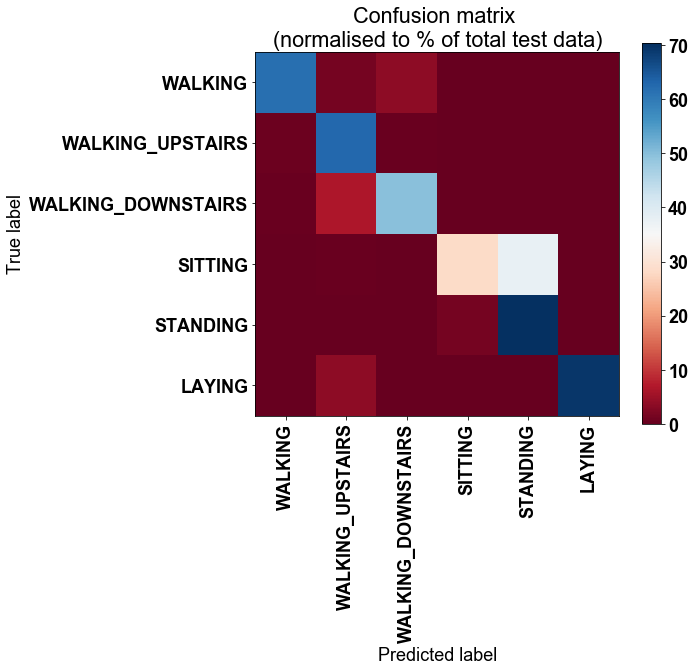

In [40]:
# Results

predictions = one_hot_predictions.argmax(1)

print("Testing Accuracy: {}%".format(100*accuracy))

print("")
print("Precision: {}%".format(100*metrics.precision_score(y_test, predictions, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(y_test, predictions, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(y_test, predictions, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*400

print("")
print("Confusion matrix (normalised to % of total test data):")
print(normalised_confusion_matrix)
print("Note: training and testing data is not equally distributed amongst classes, ")
print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# Plot Results: 
width = 10
height = 9
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix, 
    interpolation='nearest', 
    #cmap=plt.cm.rainbow
    cmap='RdBu'
    #cmap=plt.cm.Wistia
)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [41]:
#The True Positives are simply the diagonal elements:
TP = np.diag(confusion_matrix)
TP

array([455, 462, 367, 210, 518, 510])

In [42]:
#The False Positives are the sum of the respective column, minus the diagonal element
FP = np.sum(confusion_matrix, axis=0) - TP
FP

array([ 11,  92,  31,  12, 279,   0])

In [43]:
#False Negatives are the sum of the respective row, minus the diagonal (i.e. TP) element:
FN = np.sum(confusion_matrix, axis=1) - TP
FN

array([ 41,   9,  53, 281,  14,  27])

In [44]:
#True Negatives for, say class 0: it means all the samples that have been correctly identified as not being 0. 
#So, essentially what we should do is remove the corresponding row & column from the confusion matrix, 
#and then sum up all the remaining elements:

num_classes = 6
TN = []
for i in range(num_classes):
    temp = np.delete(confusion_matrix, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))
TN

[2440, 2384, 2496, 2444, 2136, 2410]

In [45]:
#Precision-Recall. ... In information retrieval, precision is a measure of result relevancy, while recall is a 
#measure of how many truly relevant results are returned. The precision-recall curve shows the tradeoff between 
#precision and recall for different threshold.

In [46]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precision for this model can be deduced as:")
print(precision)
print("")
print("")
print("Recall for this model can be deduced as:")
print(recall)

Precision for this model can be deduced as:
[0.97639485 0.83393502 0.92211055 0.94594595 0.64993726 1.        ]


Recall for this model can be deduced as:
[0.91733871 0.98089172 0.87380952 0.42769857 0.97368421 0.94972067]


In [47]:
sum(np.diag(confusion_matrix))/np.sum(confusion_matrix)


0.8557855446216491

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       496
           1       0.83      0.98      0.90       471
           2       0.92      0.87      0.90       420
           3       0.95      0.43      0.59       491
           4       0.65      0.97      0.78       532
           5       1.00      0.95      0.97       537

   micro avg       0.86      0.86      0.86      2947
   macro avg       0.89      0.85      0.85      2947
weighted avg       0.89      0.86      0.85      2947

